In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set_context('notebook')

In [3]:
data=pd.read_csv(r'C:\Users\user\Music\Projects\classification prob (logistic regression)\logistic regression example\Bank009.csv')
data=data.dropna()
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [4]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [5]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

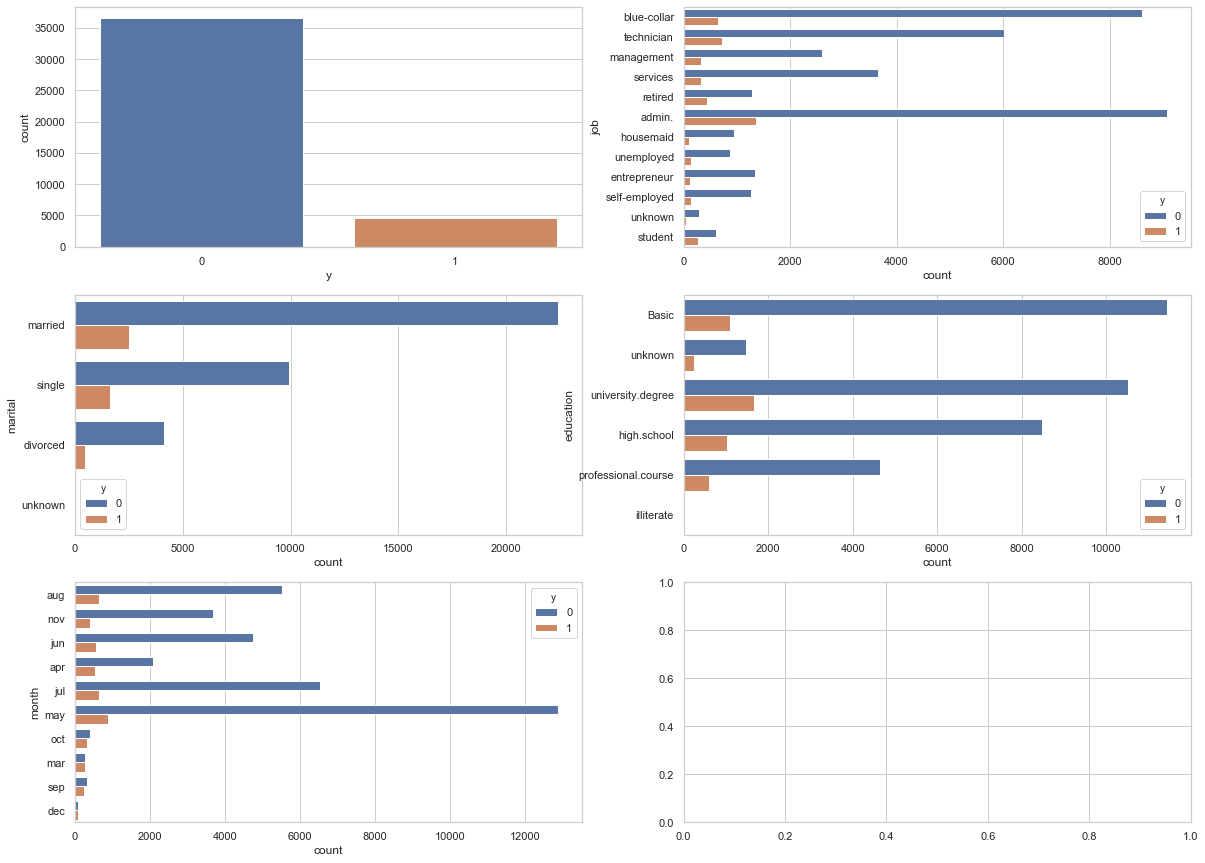

In [26]:
fig,ax=plt.subplots(3,2,figsize=(20,15))
sns.countplot(data['y'],ax=ax[0,0])

sns.countplot(y=data['job'],hue=data['y'],ax=ax[0,1])
sns.countplot(y=data['marital'],hue=data['y'],ax=ax[1,0])
sns.countplot(y=data['education'],hue=data['y'],ax=ax[1,1])
sns.countplot(y=data['month'],hue=data['y'],ax=ax[2,0])


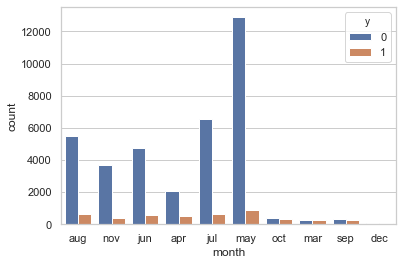

In [20]:
sns.countplot(data['month'],hue=data['y'])

### Creating dummies

In [5]:
data_final=pd.get_dummies(data)
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

#### Using SMOTE method from Imblearn

In [6]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


#### Using RFE and LOGreg

In [7]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https:/

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[38 39 32 40 31 37 30 34 21 36 15  8  9 10 14 19 13 12 18 11 17 16  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 22 24 25 27 26
 35 20 23 29 28  1  1  1  1  1  7  6 33]


In [8]:
A=rfe.support_
B=rfe.ranking_

In [9]:
supports=np.where(A==True)
supports

(array([22, 23, 24, 25, 26, 27, 29, 30, 31, 35, 36, 37, 38, 39, 40, 53, 54,
        55, 56, 57], dtype=int64),)

In [10]:
column_list=os_data_X.columns.values

In [11]:
column_val=[]
for i in supports:
    column_val.append(column_list[i])

In [12]:
column_val

[array(['marital_divorced', 'marital_married', 'marital_single',
        'marital_unknown', 'education_Basic', 'education_high.school',
        'education_professional.course', 'education_university.degree',
        'education_unknown', 'housing_no', 'housing_unknown',
        'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
        'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
        'day_of_week_tue', 'day_of_week_wed'], dtype=object)]

In [13]:
column_val2=['marital_divorced', 'marital_married', 'marital_single',
        'marital_unknown', 'education_Basic', 'education_high.school',
        'education_professional.course', 'education_university.degree',
        'education_unknown', 'housing_no', 'housing_unknown',
        'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
        'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
        'day_of_week_tue', 'day_of_week_wed']

In [14]:
X=os_data_X[column_val2]
Y=os_data_y['y']

In [15]:
import statsmodels.api as sm

In [16]:
results=sm.Logit(Y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.457968
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51115
Method:                           MLE   Df Model:                           18
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.3393
Time:                        20:27:35   Log-Likelihood:                -23418.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2580      0.059      4.374      0.000       0.142       0.374
marital_married                   0.7894      0.035     22.825      0.000       0.722       0.857
marital_single                    0.9810      0.038     25.533      0.000       0.906       1.056
marital_unknown                   0.3819      0.369      1.036      0.300      -0.341       1.104
education_Basic                  -2.0985      0.043    -48.902      0.000      -2.183      -2.014
education_high.school            -1.8766      0.044    -42.674      0.000      -1.963      -1.790
education_professional.course    -2.1117      0.054    -39.012      0.000      -2.218      -2.006
education_university.degree      -1.4350      0.039    -36.518      0.000      -1.512      -1.358
education_unknown                -2.0197      0.080    -25.239      0.000      -2.177      -1.863
housing_no                       -0.0910      0.037     -2.445      0.014      -0.164      -0.018
housing_unknown                   0.9016   1.17e+07   7.68e-08      1.000    -2.3e+07     2.3e+07
housing_yes                       0.1161      0.035      3.280      0.001       0.047       0.185
loan_no                           2.6975      0.038     71.090      0.000       2.623       2.772
loan_unknown                      0.9016   1.17e+07   7.68e-08      1.000    -2.3e+07     2.3e+07
loan_yes                          2.0453      0.057     35.843      0.000       1.933       2.157
day_of_week_fri                  -2.9517      0.048    -61.224      0.000      -3.046      -2.857
day_of_week_mon                  -3.1076      0.049    -63.838      0.000      -3.203      -3.012
day_of_week_thu                  -2.7486      0.045    -60.534      0.000      -2.838      -2.660
day_of_week_tue                  -2.8551      0.047    -60.529      0.000      -2.948      -2.763
day_of_week_wed                  -2.7562      0.046    -59.519      0.000      -2.847      -2.665
=================================================================================================
"""

In [17]:
X1=X.drop(['marital_unknown','housing_unknown','loan_unknown'],axis=1)

In [18]:
results=sm.Logit(Y,X1).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.459275
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51117
Method:                           MLE   Df Model:                           16
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.3374
Time:                        20:27:36   Log-Likelihood:                -23485.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2736      0.059      4.658      0.000       0.158       0.389
marital_married                   0.8058      0.034     23.526      0.000       0.739       0.873
marital_single                    0.9975      0.038     26.166      0.000       0.923       1.072
education_Basic                  -2.0449      0.042    -48.243      0.000      -2.128      -1.962
education_high.school            -1.8242      0.043    -41.957      0.000      -1.909      -1.739
education_professional.course    -2.0592      0.054    -38.303      0.000      -2.165      -1.954
education_university.degree      -1.3820      0.039    -35.683      0.000      -1.458      -1.306
education_unknown                -1.9681      0.080    -24.665      0.000      -2.125      -1.812
housing_no                       -0.1380      0.037     -3.752      0.000      -0.210      -0.066
housing_yes                       0.0698      0.035      1.998      0.046       0.001       0.138
loan_no                           2.6278      0.037     71.093      0.000       2.555       2.700
loan_yes                          1.9681      0.056     35.009      0.000       1.858       2.078
day_of_week_fri                  -2.8896      0.048    -60.711      0.000      -2.983      -2.796
day_of_week_mon                  -3.0480      0.048    -63.391      0.000      -3.142      -2.954
day_of_week_thu                  -2.6869      0.045    -60.059      0.000      -2.775      -2.599
day_of_week_tue                  -2.7937      0.047    -60.027      0.000      -2.885      -2.703
day_of_week_wed                  -2.6931      0.046    -58.994      0.000      -2.783      -2.604
=================================================================================================
"""

In [19]:
X1_train,X1_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,random_state=365)

In [20]:
logreg=LogisticRegression()
reg=logreg.fit(X1_train,Y_train)

In [21]:
Y_predict=logreg.predict(X1_test)

In [22]:
logreg.score(X1_test,Y_test)

0.9260780287474333

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(Y_test,Y_predict)
cm

array([[5080,   16],
       [ 740, 4391]], dtype=int64)

In [25]:
accuracy=((cm[0,0]+cm[1,1])/cm.sum())*100
accuracy

92.60780287474333

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      5096
           1       1.00      0.86      0.92      5131

    accuracy                           0.93     10227
   macro avg       0.93      0.93      0.93     10227
weighted avg       0.93      0.93      0.93     10227



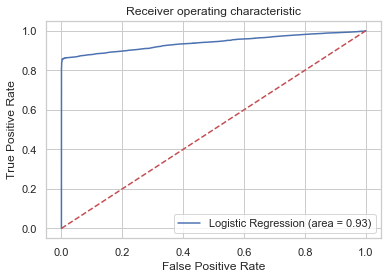

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()